# K plus proches voisins avec Python
On vous a procuré les données d'une société! Ils ont caché le titre des colonnes mais vous ont procuré les vraies données et les classes. 

Vous allez alors essayer d'utiliser un modèle KNN pour prédire la classe des données en se basant sur des features dont vous ne connaissez pas la signification.

## Importation de librairies



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## L'acquisition des données

On met le paramètre index_column=0 pour utiliser la première colonne comme index.


In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## La normalisation des features
Les K plus proches voisins prédisent la classe d'une observation en identifiant les observations les plus proches d'elle, l'échelle des features est important. Les variables qui ont une plus grande échelle (intervalle) vont alors avoir un plus grand effet sur la distance entre les observations, et biensûr une plus grande influence sur les performances d'un classificateur KPPV.
Les features de petite échelle auront alors une moindre influence.


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Qu'est ce qui a changé selon vous dans ces données? **Les variables prennent des valeurs qui ont maintenant des ordres de grandeur similaires**.

## Séparation des données d'apprentissage et données de test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Utilisation des KPPV
Vous vous rappellez bien que nous essayons de prédire si une observation a TARGET_CLASS=1 ou bien TARGET_CLASS=0 . Nous commencerons par k=1. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

## Prédictions et évaluations

 Evaluons maintenant notre modèle.

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[139  16]
 [  9 136]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.89      0.94      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



***Ici vous notez bien que les représentants chaque sont à peu près à égalité 154 et 146***

## Choisir une valeur de K

Choisissons maintenant la meilleure valeur de K en créant un modèle pour toutes les valeurs comprises entre 1 et 40.

In [18]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, "Taux d'erreur")

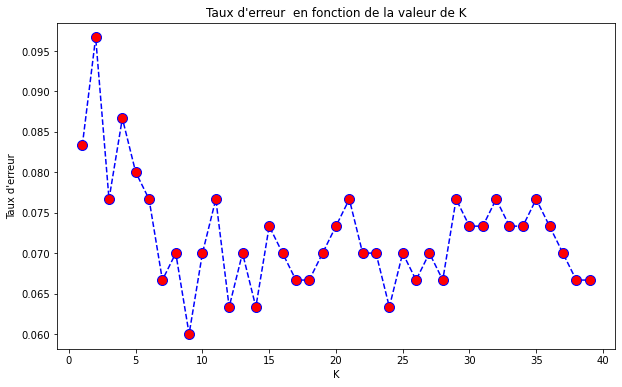

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Taux d'erreur  en fonction de la valeur de K")
plt.xlabel('K')
plt.ylabel("Taux d'erreur")

Nous pouvons remarquer qu'au delà de k=23 le taux d'erreur est compris entre 0.05 et 0.06. Nous allons ré-entrainer notre modèle en choisissant cette valeur et voir l'impact que celà aura sur la qualité de la classification.


In [20]:
# Premièrement nous allons utiliser k=1 pour la comparaison
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[139  16]
 [  9 136]]


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.89      0.94      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [21]:
# Maintenant nous utilisons k=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[140  15]
 [  6 139]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       155
           1       0.90      0.96      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



*** Vous avez sans doute remarqué l'influence que le nombre de voisins K a pour effet sur la classification et l'importance de visualiser la courbe du taux d'erreurs pour déterminer la meilleure valeur de k ***.
*** Il est aussi à noter que vous avez utilisé la distance de Minkowski qui est la distance par défaut pour le modèle KNN ***

In [22]:
# Maintenant nous utilisons k=32
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


[[140  15]
 [  8 137]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       155
           1       0.90      0.94      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
# Maintenant nous utilisons k=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[141  14]
 [ 10 135]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       155
           1       0.91      0.93      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

